<a href="https://colab.research.google.com/github/Nazanin-Rashedi/Webscraping-LDATopicModelling/blob/main/LDA_TopicModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google-trans-new

In [ ]:
import pandas as pd
from googletrans import Translator

In [ ]:
nr_text = pd.read_csv("----------------.csv")

In [ ]:
nr_text = nr_text[nr_text['complete_text'].notna()]

In [ ]:
nr_text.insert(loc=7, column='complete_text_en', value ='')

In [ ]:
translator = Translator()

In [ ]:
nr_text['complete_text'] = nr_text['complete_text'].astype(str)

In [ ]:
#nr_text['complete_text_en'] = nr_text['complete_text'].map(lambda x: translator.translate(x, src="de", dest="en").text)

for idx, row in nr_text.iterrows():
  try:
    nr_text.loc[idx,'complete_text_en'] = translator.translate(row['complete_text'], src="de", dest="en").text
  except:
    pass
     

In [ ]:
!pip install stop-words

In [ ]:
!pip install pyLDAvis

In [ ]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.wordnet import WordNetLemmatizer
from gensim import corpora, models
import pandas as pd
import gensim
import pyLDAvis
import pyLDAvis.gensim_models

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
def remove_tags(text):
  text = text.replace('<br>', '')
  text = text.replace('</br>', '')
  text = text.replace('<em>', '')
  text = text.replace('</em>', '')
  text = text.replace('<span>', '')
  text = text.replace('</span>', '')
  text = text.replace('br', '')
  text = text.replace('em', '')
  text = text.replace('span', '')
  
  return text


In [ ]:
import re

nr_text['preprocessed_en_text']  = nr_text['complete_text_en'] .map(lambda x: remove_tags(x))
nr_text['preprocessed_en_text']  = nr_text['preprocessed_en_text'] .map(lambda x: x.lower())
nr_text['preprocessed_en_text'] = nr_text['preprocessed_en_text'].map(lambda x: re.sub('[<>,\.!?]', '', x))

nr_text['preprocessed_en_text'] .head()

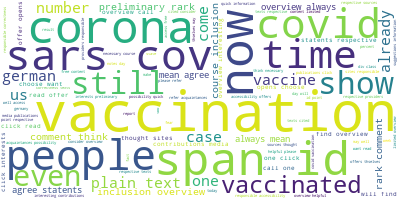

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(nr_text['preprocessed_en_text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','span','do','does','div'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = nr_text.preprocessed_en_text.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['tomorrow', 'rescuers', 'hayers', 'country', 'whose', 'government', 'wants', 'prevent', 'two', 'degrees', 'global', 'warming', 'hundred', 'years', 'ignored', 'warning', 'liters', 'per', 'square', 'meter', 'next', 'day', 'one', 'thing', 'serious', 'probl', 'reality', 'rber', 'color', 'sky']


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [ ]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
nr_text['topics'] = ''

In [ ]:
str(nr_text[5:6]['preprocessed_en_text'])

'9    intensive care units - again a disaster with a...\nName: preprocessed_en_text, dtype: object'

In [ ]:


nr_text['topics']  = nr_text['complete_text_en'] .map(lambda x: lda_model[x])

In [ ]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.106786 -0.023327       1        1  17.545881
6     -0.058906  0.025800       2        1  17.493845
8      0.036865  0.007058       3        1  12.916511
3      0.045610 -0.028749       4        1  11.713049
7     -0.025900  0.001695       5        1   9.045803
2     -0.028929  0.013848       6        1   8.963844
5      0.025693 -0.031147       7        1   8.435562
1      0.047770  0.035875       8        1   7.225425
4      0.025271  0.024772       9        1   3.779286
9      0.039312 -0.025824      10        1   2.880794, topic_info=             Term        Freq       Total Category  logprob  loglift
1313     overview  159.000000  159.000000  Default  30.0000  30.0000
1317   respective  111.000000  111.000000  Default  29.0000  29.0000
1305        click   79.000000   79.000000  Default  28.0000  28.0000
1338        texts   73.000000   73.000000  Default  27.0000  27.0000
774          fear   35.000000   35.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
43            one    1.382086  117.368026  Topic10  -6.2244  -0.8946
191            th    1.259456   41.852418  Topic10  -6.3173   0.0436
11            day    1.318851   84.953085  Topic10  -6.2712  -0.6182
600   information    1.314225   88.219887  Topic10  -6.2747  -0.6595
312       contact    1.256222   59.111713  Topic10  -6.3199  -0.3042

[802 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2935      3  0.557974   aachen
1226      1  0.528732   access
1226      2  0.226599   access
1226      4  0.025178   access
1226      5  0.075533   access
...     ...       ...      ...
971       7  0.114303  youtube
971       8  0.114303  youtube
971       9  0.228606  youtube
2244      4  0.392699  ziegler
2244      7  0.392699  ziegler

[2005 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 7, 9, 4, 8, 3, 6, 2, 5, 10])